# Text Clustering on Machinelearninggeek.com Data
---
#### *Applied **`Tf-Idf Vectorizer`** and **`K-Means Algorithm`** to better segment the articles fetched using **`requests`** library from [Machine Learning Geek](https://machinelearninggeek.com/m)*
---
- Submitted By : By Piyush Joshi
- Roll Number : DS5B-2121
- Submitted To : Prof. Avinash Nalvani
- Subject : Natural Language Processing
- Batch : MSc 3rd Sem (Data Science and Analytics)
- College : School of Data Science and Forecasting, DAVV, Indore

## Building a NLP Pipeline for Text Clustering
---
### Step 1 : Data Acquisition
- In the first step we will get the data from website [https://machinelearninggeek.com/]( https://machinelearninggeek.com/) using the **`requests`** library and scrap it using the **`BeautifulSoup`** Library
- Once we are done with this step we will use **`pandas`** to convert it into a csv file

In [1]:
import requests
from bs4 import BeautifulSoup as bs
import re
import pandas as pd

#### Structure of the website
- In order to scrap the website we first need to understand the Document Object Model (DOM) of the website
- The website is composed of three category of pages which differ in their structure, link syntax and the way information is displayed on them
- The three category are being displayed in the diagram below out of which only two contains text which is to be scrapped

[![](https://mermaid.ink/img/pako:eNqdkk1rwkAQhv_KMqcVopgvNaH0oJYiqAQiCG16WJMxLprdkGzapup_75pUKngo9LQ7L-_MPMzMEWKZIPiQFizfkdU0EoQs6OuCxTsucI6sEFykz4j7Xiyztw7pdh_JaSXJBkkZ66Qck9M6MOkaNzlLkUyYwlQWNTFbb0CDWu2k6ERC2xppSZfz4CZezOlPP3Jt2PkPB3nYFFpcB9Y9jdX0s5q0kIaKKV4qHpc38ozOhMLinePHjTqe0jFPyZQpdqNOQjphJZJQVUmt9b9Rl1IR1eCGv2Oz70Ht1j-mYyn3FzwwIMMiYzzRazpe5hKB2mGGEfj6m-CWVQcVQSTO2lrlia70lHAlC_BVUaEBrFIyrEV8jVvPlDO99Az8LTuUWs2ZeJEyu5p0CP4RPsEf9TzHdTzPsfq2Y-rXgBp803Z6lmeP7IHnDizTGjpnA76aAv2eNxgOPct0bdsdOa7nGoAN0aI9tubmzt8i-seo)](https://mermaid.live/edit#pako:eNqdkk1rwkAQhv_KMqcVopgvNaH0oJYiqAQiCG16WJMxLprdkGzapup_75pUKngo9LQ7L-_MPMzMEWKZIPiQFizfkdU0EoQs6OuCxTsucI6sEFykz4j7Xiyztw7pdh_JaSXJBkkZ66Qck9M6MOkaNzlLkUyYwlQWNTFbb0CDWu2k6ERC2xppSZfz4CZezOlPP3Jt2PkPB3nYFFpcB9Y9jdX0s5q0kIaKKV4qHpc38ozOhMLinePHjTqe0jFPyZQpdqNOQjphJZJQVUmt9b9Rl1IR1eCGv2Oz70Ht1j-mYyn3FzwwIMMiYzzRazpe5hKB2mGGEfj6m-CWVQcVQSTO2lrlia70lHAlC_BVUaEBrFIyrEV8jVvPlDO99Az8LTuUWs2ZeJEyu5p0CP4RPsEf9TzHdTzPsfq2Y-rXgBp803Z6lmeP7IHnDizTGjpnA76aAv2eNxgOPct0bdsdOa7nGoAN0aI9tubmzt8i-seo)

#### Finding the title and list of pages of various category

In [2]:
init_request = requests.get('https://machinelearninggeek.com/')
webpages = []
soup = bs(init_request.content,'html.parser')
header = soup.find('div',class_="menu-primary-container")
nav_bar = header.find('ul')
nav_bar_links = nav_bar.find_all('a')
for link in nav_bar_links:
  webpages.append([link.text,link.get('href')])
webpage_urls = webpages[0:7]
webpage_urls

[['Machine Learning', 'https://machinelearninggeek.com/machine-learning/'],
 ['NLP', 'https://machinelearninggeek.com/nlp/'],
 ['Statistics', 'https://machinelearninggeek.com/category/statistics/'],
 ['Interview', 'https://machinelearninggeek.com/category/interview/'],
 ['Python', 'https://machinelearninggeek.com/python/'],
 ['Big Data', 'https://machinelearninggeek.com/category/big-data/'],
 ['Case Studies',
  'https://machinelearninggeek.com/category/business-analytics/']]

#### Fetching Articles and Titles

In [3]:
def fetch_data(link):
    article = []
    r = requests.get(link)
    soup = bs(r.content,'html.parser')
    # r2 = soup.find('header',class_="entry-header")
    # r2 = re.sub('\n','',r2.text)
    r1 = soup.find('div',class_="entry-content clearfix")
    paras = r1.find_all('p')
    for para in paras:
      article.append(para.text)
    return " ".join(article)

def fetch_header(link):
  r = requests.get(link)
  soup = bs(r.content,'html.parser')
  r2 = soup.find('header',class_="entry-header")
  r2 = re.sub('\n','',r2.text)
  return r2

lst = []
for webpage in range(len(webpage_urls)):
  r = requests.get(webpage_urls[webpage][1])
  soup = bs(r.content,'html.parser')
  if (webpage==0)or(webpage==1)or(webpage==4):
    s = soup.find('div',class_="entry-content clearfix")
    unor = s.find_all('ul')
    for u in unor:
      links = u.find_all('a')
      for link in links:
        try:
          lst.append([webpage_urls[webpage][0],fetch_header(link.get('href')),fetch_data(link.get('href'))])
        except:
          continue
  else:
    s = soup.find_all('div',class_="entry-content clearfix")
    for t in s:
      links = t.find_all('a')
      for link in links:
        try:
          lst.append([webpage_urls[webpage][0],fetch_header(link.get('href')),fetch_data(link.get('href'))])
        except:
          continue

In [4]:
len(lst)

105

In [5]:
lst[1]

['Machine Learning',
 'Activation Functions ',
 'The activation function defines the output of a neuron in terms of the induced local field. Activation functions are a single line of code that gives the neural networks non-linearity and expressiveness.\xa0There are many activation functions such as Identity function, Step function, Sigmoid function, Tanh, ReLU, Leaky ReLU, Parametric ReLU, and Softmax function. We can see some of them in the following table: In this tutorial, we are going to cover the following topics: The identity function is a function that maps input to the same output value. It is a linear operator in vector space. Also, a known straight-line function where activation is proportional to the input. The simplest example of a linear activation function is a linear equation. \xa0f(x) = a * x,where a ∈ R The major problem with such kind of linear function it cannot handle complex scenarios.\xa0 In Binary Step Function, if the value of Y is above a certain value known as

#### Exporting the Dataset

In [6]:
import pandas as pd
dataset = pd.DataFrame(lst,columns=['Category','Title','Article'])
dataset.head()

,Category,Title,Article
0,Machine Learning,Introduction to Artificial Neural Network,This is an introductory article for the artifi...
1,Machine Learning,Activation Functions,The activation function defines the output of ...
2,Machine Learning,Multi-Layer Perceptron Neural Network using Py...,"In this tutorial, we will focus on the multi-l..."
3,Machine Learning,Backpropagation Neural Network using Python,Backpropagation neural network is used to impr...
4,Machine Learning,Understanding Logistic Regression and Building...,"Learn about Logistic Regression, its basic pro..."


In [7]:
dataset.to_csv('21_Text_Clustering_Piyush_Joshi') # Dataset saved to Google Colab's Runtime Memory

#### Load the Dataset

In [8]:
# Load the Data
df = dataset

In [9]:
df.head()

,Category,Title,Article
0,Machine Learning,Introduction to Artificial Neural Network,This is an introductory article for the artifi...
1,Machine Learning,Activation Functions,The activation function defines the output of ...
2,Machine Learning,Multi-Layer Perceptron Neural Network using Py...,"In this tutorial, we will focus on the multi-l..."
3,Machine Learning,Backpropagation Neural Network using Python,Backpropagation neural network is used to impr...
4,Machine Learning,Understanding Logistic Regression and Building...,"Learn about Logistic Regression, its basic pro..."


### Step 2 : Data Exploration and Pre-Processing
#### Data Exploration

In [10]:
df2 = df.groupby(['Category'])['Category'].count()
df2

Category
Big Data             9
Case Studies         7
Interview           10
Machine Learning    30
NLP                 16
Python              29
Statistics           4
Name: Category, dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  105 non-null    object
 1   Title     105 non-null    object
 2   Article   105 non-null    object
dtypes: object(3)
memory usage: 2.6+ KB


#### Label Encoding the Category Column
- Encode the Categorical Column Category using the **`preprocessing`** class from **sklearn**
- Using this a new column by the name **`Category_new`** will be created that contains the encoded version of the category

In [12]:
from sklearn import preprocessing
obj_df = df.select_dtypes(include = ['object']).copy() 
# these are categorical columns which we want to create a dummy variable
print(obj_df.head())

           Category                                              Title  \
0  Machine Learning         Introduction to Artificial Neural Network    
1  Machine Learning                              Activation Functions    
2  Machine Learning  Multi-Layer Perceptron Neural Network using Py...   
3  Machine Learning       Backpropagation Neural Network using Python    
4  Machine Learning  Understanding Logistic Regression and Building...   

                                             Article  
0  This is an introductory article for the artifi...  
1  The activation function defines the output of ...  
2  In this tutorial, we will focus on the multi-l...  
3  Backpropagation neural network is used to impr...  
4  Learn about Logistic Regression, its basic pro...  


In [13]:
lb_make = preprocessing.LabelEncoder()
df[f"Category_new"] = lb_make.fit_transform(df[f"Category"])

In [14]:
df.sample(5)

,Category,Title,Article,Category_new
41,NLP,Text Classification using Python spaCy,In the previous two articles on text analytics...,4
104,Case Studies,Predicting Employee Churn in Python,"Analyze employee churn, Why employees are leav...",1
13,Machine Learning,Introduction to Ensemble Techniques: Bagging a...,Ensemble Techniques are Machine Learning techn...,3
91,Big Data,Apache Hive Hands-0n,"In this tutorial, we will focus on Hadoop Hive...",0
65,Python,Iterating over rows and columns in Pandas Data...,Iteration is the process in which we traverse ...,5


#### Corpus Analysis
A corpus is the compilation of all the text under consideration. In this case its the aggregation of all the text in the column **'Article'**

In [15]:
text = str(' '.join(df.Article.tolist()))

In [16]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
from nltk.probability import FreqDist
fd = FreqDist(word_tokenize(text))
fd.most_common(8)

[('the', 4559),
 ('.', 4553),
 (',', 4044),
 ('of', 2192),
 ('and', 1931),
 ('is', 1725),
 ('a', 1648),
 ('to', 1642)]

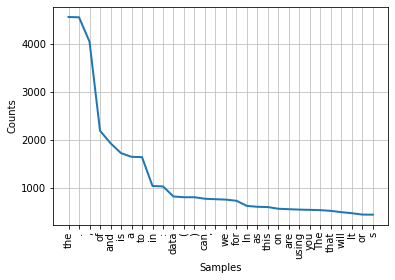

In [18]:
fd.plot(30,cumulative = False)

##### As we can clearly observe from the corpus analysis that the majority of the words within it are stop words (that is the, of, a, is etc.) and punctuations(,:) which do not contribute to the meaning of the sentence hence we need to remove them

#### Text Normalization
We will create a new column in the dataframe by the name **`Cleaned_Article`** and perform all the pre-processing operations there

In [19]:
def lower_text(text):
  return text.lower()
df['Cleaned_Article'] = df['Article'].apply(lower_text)

In [20]:
df.head()

,Category,Title,Article,Category_new,Cleaned_Article
0,Machine Learning,Introduction to Artificial Neural Network,This is an introductory article for the artifi...,3,this is an introductory article for the artifi...
1,Machine Learning,Activation Functions,The activation function defines the output of ...,3,the activation function defines the output of ...
2,Machine Learning,Multi-Layer Perceptron Neural Network using Py...,"In this tutorial, we will focus on the multi-l...",3,"in this tutorial, we will focus on the multi-l..."
3,Machine Learning,Backpropagation Neural Network using Python,Backpropagation neural network is used to impr...,3,backpropagation neural network is used to impr...
4,Machine Learning,Understanding Logistic Regression and Building...,"Learn about Logistic Regression, its basic pro...",3,"learn about logistic regression, its basic pro..."


#### Remove URL
As the data is web scrapped there is always a possibility of presence of URLs which needs to be removed using **Regular Expressions**

In [21]:
def url_remover(lst):
  URLless_string = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', lst)
  return URLless_string
df['Cleaned_Article'] = df['Cleaned_Article'].apply(url_remover)
df['Cleaned_Article'][1:5]

1    the activation function defines the output of ...
2    in this tutorial, we will focus on the multi-l...
3    backpropagation neural network is used to impr...
4    learn about logistic regression, its basic pro...
Name: Cleaned_Article, dtype: object

#### Remove HTML Tags
The below **regular expressions** helps to remove the HTML Tags within the text

In [22]:
CLEANR = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')

def cleanhtml(raw_html):
  cleantext = re.sub(CLEANR, '', raw_html)
  return cleantext
df['Cleaned_Article']=df['Cleaned_Article'].apply(cleanhtml)
df['Cleaned_Article'][1:5]

1    the activation function defines the output of ...
2    in this tutorial, we will focus on the multi-l...
3    backpropagation neural network is used to impr...
4    learn about logistic regression, its basic pro...
Name: Cleaned_Article, dtype: object

### Tokenization
#### Sentence Tokenization
Here we will tokenize each of the document (or column within dataframe) into specific sentences separated by full stops. Here we will use **nltk**

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
from nltk.tokenize import sent_tokenize
def sen_token(text):
  return sent_tokenize(text)
df['Cleaned_Article'].apply(sen_token)

0      [this is an introductory article for the artif...
1      [the activation function defines the output of...
2      [in this tutorial, we will focus on the multi-...
3      [backpropagation neural network is used to imp...
4      [learn about logistic regression, its basic pr...
                             ...                        
100    [in this world of the internet, information is...
101    [in this python tutorial, explore movie data o...
102    [learn how to calculate customer life time val...
103    [in this tutorial, you’re going to learn how t...
104    [analyze employee churn, why employees are lea...
Name: Cleaned_Article, Length: 105, dtype: object

#### Word Tokenization
Here we will tokenize the text into separate words listings

In [25]:
from nltk.tokenize import word_tokenize
def wrd_token(text):
  return word_tokenize(text)
df['Cleaned_Article'] = df['Cleaned_Article'].apply(wrd_token)
df['Cleaned_Article'][1:5]

1    [the, activation, function, defines, the, outp...
2    [in, this, tutorial, ,, we, will, focus, on, t...
3    [backpropagation, neural, network, is, used, t...
4    [learn, about, logistic, regression, ,, its, b...
Name: Cleaned_Article, dtype: object

#### Remove Stop Words
##### In the word it can be clearly observed that the stop words needs to be removed from the text

In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [28]:
import string
punctuations = list(string.punctuation)
print(punctuations)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [29]:
other_stop_words = ["'s",'’','‘','“','”']

In [30]:
df['Cleaned_Article'] = df['Cleaned_Article'].apply(lambda x: [item for item in x if item not in (stop_words + punctuations + other_stop_words)])
df['Cleaned_Article'][1:5]

1    [activation, function, defines, output, neuron...
2    [tutorial, focus, multi-layer, perceptron, wor...
3    [backpropagation, neural, network, used, impro...
4    [learn, logistic, regression, basic, propertie...
Name: Cleaned_Article, dtype: object

#### Stemming
Now we will reduce words into their stem using SnowStemmer

In [31]:
from nltk.stem import SnowballStemmer
stemmed_words = []
sb = SnowballStemmer("english") 

In [32]:
df['Cleaned_Article'].apply(lambda x: [sb.stem(y) for y in x])[1:5]

1    [activ, function, defin, output, neuron, term,...
2    [tutori, focus, multi-lay, perceptron, work, h...
3    [backpropag, neural, network, use, improv, acc...
4    [learn, logist, regress, basic, properti, work...
Name: Cleaned_Article, dtype: object

#### Lemmatization
Here we will reduce each word to its stem word that exist within the language

In [33]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [34]:
import nltk
nltk.download('omw-1.4')
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [35]:
def lemmatize(s):
     s = [lem.lemmatize(word) for word in s]
     return s
df['Cleaned_Article']=df['Cleaned_Article'].apply(lambda x: lemmatize(x))
df['Cleaned_Article'][1:5]

1    [activation, function, defines, output, neuron...
2    [tutorial, focus, multi-layer, perceptron, wor...
3    [backpropagation, neural, network, used, impro...
4    [learn, logistic, regression, basic, property,...
Name: Cleaned_Article, dtype: object

### Step 3 : Feature Engineering
Here we will create features for the machine learning model, but lets first explore each of the category of articles and try to infere what the feature could be. The larger a word appears in a wordcloud more it will represent each of the category  

In [36]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

def word_cloud(title_, text):
    """ Create WorldCloud """
    stopword_list = set(STOPWORDS) 

    wordcloud = WordCloud(width = 400, height = 200, 
                    background_color ='white', 
                    stopwords = stopword_list, 
                    min_font_size = 10).generate(text) 

    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title_, fontsize=20)
    plt.show() 

In [37]:
def joiner(txt):
  return " ".join(txt)
df['Cleaned_Text'] = df['Cleaned_Article'].apply(joiner)

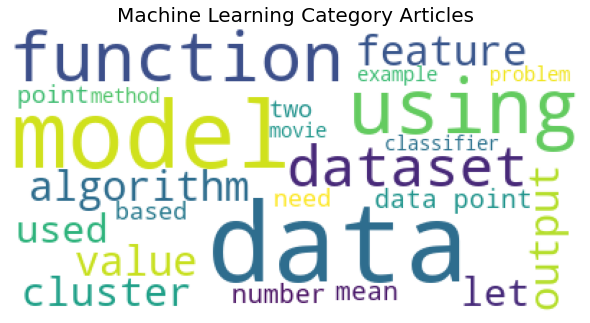

None


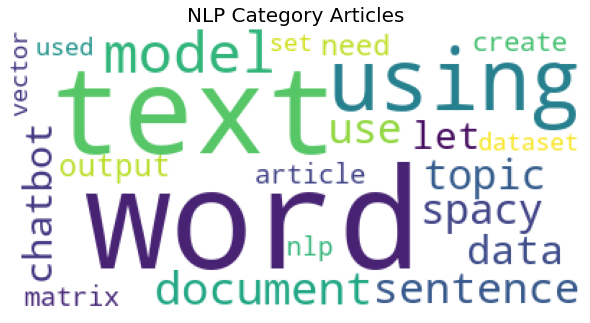

None


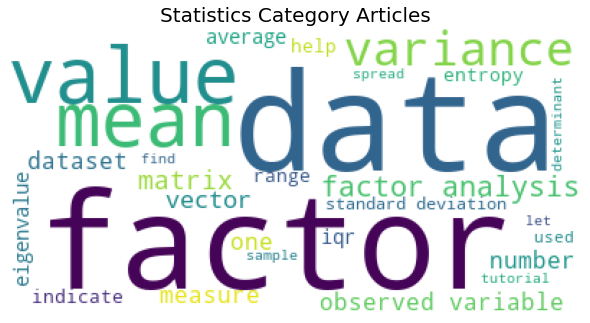

None


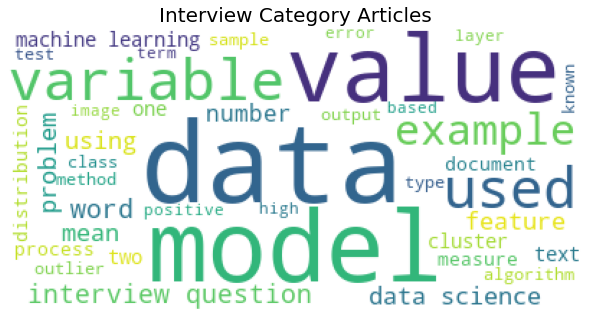

None


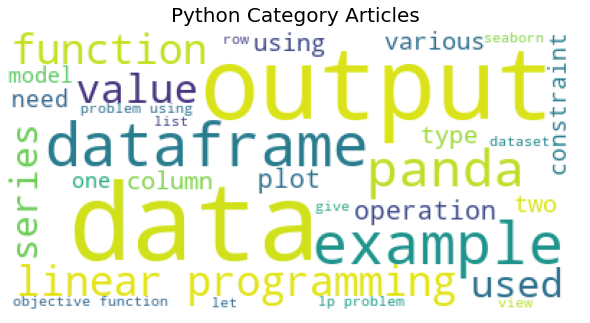

None


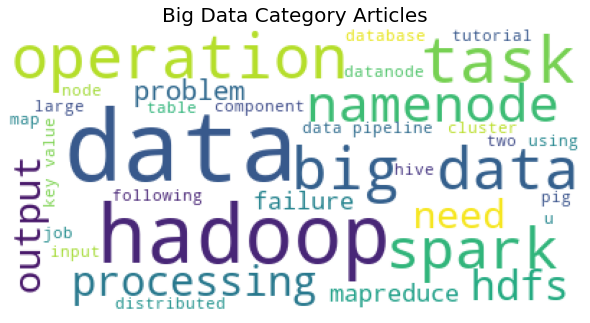

None


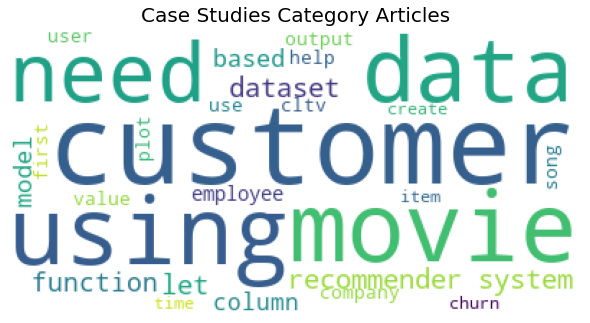

None


In [38]:
for i in df.Category.unique():
  paragraph=' '.join(df[df.Category==i].Cleaned_Text.tolist())
  print(word_cloud(f"{i} Category Articles", paragraph))

### Vectorization
Here we will use both Bag of Words and Term Frequency-InverseDocument Frequency Vectorization techniques to get the features from text
#### Bag of Words (BOW)
Here we will use Bag of Words to create features for each set of documents (or articles) for our clustering model

In [39]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
bow = count_vect.fit_transform(df['Cleaned_Text'].values)
bow.shape

(105, 4381)

In [40]:
bow

<105x4381 sparse matrix of type '<class 'numpy.int64'>'
	with 21230 stored elements in Compressed Sparse Row format>

To understand what kind of words generated as columns by BOW, let's see the 10 columns generated by it

In [41]:
terms = count_vect.get_feature_names()
terms[1000:1010]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['costly',
 'could',
 'count',
 'counting',
 'country',
 'countvector',
 'countvectorized',
 'countvectorizer',
 'couple',
 'coupon']

#### Term Frequency Inverse Document Frequency (TfIDF)
Here we will use the TfIdf Vectorization Technique to compute the features

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf = tfidf_vect.fit_transform(df['Cleaned_Text'].values)
tfidf.shape

(105, 4381)

In [43]:
terms1 = tfidf_vect.get_feature_names()
terms1[1000:1010]

['costly',
 'could',
 'count',
 'counting',
 'country',
 'countvector',
 'countvectorized',
 'countvectorizer',
 'couple',
 'coupon']

### Step 4 : Modelling
In this step, we will model the features using the K-Means Clustering Algorithm 
#### K-Means Clustering in BoW

In [44]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 7,init='k-means++',random_state=99)
model.fit(bow)

KMeans(n_clusters=7, random_state=99)

In [45]:
labels = model.labels_
cluster_center=model.cluster_centers_

In [46]:
cluster_center

array([[0.        , 0.05555556, 0.05555556, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.01785714, 0.        ,
        0.01785714],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

#### K-Means Clustering in TfIDf

In [47]:
from sklearn.cluster import KMeans
model_tf = KMeans(n_clusters = 7,random_state=99)
model_tf.fit(tfidf)

KMeans(n_clusters=7, random_state=99)

In [48]:
labels_tf = model_tf.labels_
cluster_center_tf=model_tf.cluster_centers_

In [49]:
cluster_center_tf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00117377, 0.00044139, 0.0006321 , ..., 0.        , 0.00117377,
        0.00096973],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00608162, 0.        ,
        0.        ]])

### Step 5 : Evaluation
Here we will use Silhoutte Score and Davis Bouldin Score for evaluation
#### Evaluation in case of Bag of Words and K-Means

##### Silhoutte Score

In [50]:
from sklearn import metrics
silhouette_score = metrics.silhouette_score(bow, labels, metric='euclidean')
silhouette_score

0.10230793210846831

#### Davis Bouldin Score

In [51]:
dbi = metrics.davies_bouldin_score(bow.toarray(), labels)
dbi

2.1641759843140784

#### Evaluation in case of TfIdf and K-means
##### Silhouette-Score

In [52]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf, labels_tf, metric='euclidean')

In [53]:
silhouette_score_tf

0.07699650210767844

##### Davis Bouldin Score

In [54]:
dbi_tf = metrics.davies_bouldin_score(tfidf.toarray(), labels_tf)
dbi_tf

2.9724067327446027

### Inference
#### Top Features within Clusters using the BOW and K-Means

In [55]:
df['Bow Clus Label'] = model.labels_ # the last column you can see the label numebers
df.groupby(['Bow Clus Label'])['Cleaned_Text'].count()
print("Top 4 Features per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = count_vect.get_feature_names()
for i in range(7):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :4]:
        print(' %s' % terms[ind], end='')
        print()

Top 4 Features per cluster:
Cluster 0: model
 data
 using
 function
Cluster 1: data
 using
 output
 value
Cluster 2: word
 text
 model
 using
Cluster 3: problem
 using
 linear
 constraint
Cluster 4: factor
 variable
 analysis
 observed
Cluster 5: movie
 system
 using
 recommender
Cluster 6: data
 mean
 value
 sample


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


#### Number of Articles in various clusters

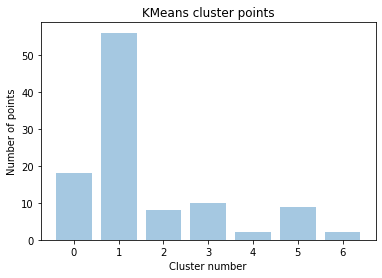

In [56]:
import matplotlib.pyplot as plt
plt.bar([x for x in range(7)], df.groupby(['Bow Clus Label'])['Cleaned_Text'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

#### Title of Articles in Various Clusters

In [57]:
for i in range(7):
  print("Articles in Cluster ", i)
  for j in range(60):
    try:
      print(df.iloc[df.groupby(['Bow Clus Label']).groups[i][j]]['Title'])
    except:
      continue
  print("-" * 70)

Articles in Cluster  0
Introduction to Artificial Neural Network 
Activation Functions 
Multi-Layer Perceptron Neural Network using Python 
Backpropagation Neural Network using Python 
Understanding Logistic Regression and Building Model in Python 
Naive Bayes Classification using Scikit-learn 
Support Vector Machine Classification in Scikit-learn 
KNN Classification using Scikit-learn 
Decision Tree Classification in Python 
Understanding Random Forest Classification and Building a Model in Python 
AdaBoost Classifier in Python 
Analyzing Sentiments of Restaurant Reviews 
Text Analytics for Beginner using Python TextBlob 
Building a Chatbot using Chatterbot in Python 
Data Science Interview Questions Part-8(Deep Learning) 
Data Science Interview Questions Part-3 (Classification) 
Predicting Customer Lifetime Value in Python 
Predicting Employee Churn in Python 
----------------------------------------------------------------------
Articles in Cluster  1
Introduction to Ensemble Techni

#### Top Features within Clusters using the TfIdf and K-Means

In [58]:
df1 = df
df1['Tfidf Clus Label'] = model_tf.labels_
df1.groupby(['Tfidf Clus Label'])['Cleaned_Text'].count()
print("Top Features per cluster:")
order_centroids = model_tf.cluster_centers_.argsort()[:, ::-1]
for i in range(7):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :4]:
        print(' %s' % terms1[ind], end='')
        print()

Top Features per cluster:
Cluster 0: panda
 dataframe
 series
 output
Cluster 1: movie
 system
 recommender
 song
Cluster 2: model
 text
 data
 word
Cluster 3: problem
 constraint
 linear
 pulp
Cluster 4: plot
 data
 seaborn
 output
Cluster 5: hadoop
 data
 big
 spark
Cluster 6: cluster
 clustering
 distance
 data


#### Number of Articles in Each Cluster

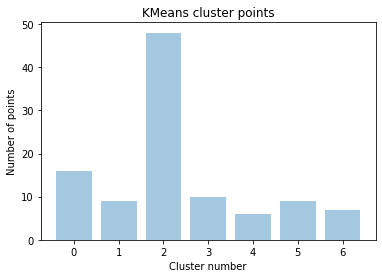

In [59]:
plt.bar([x for x in range(7)], df1.groupby(['Tfidf Clus Label'])['Cleaned_Text'].count(), alpha = 0.4)
plt.title('KMeans cluster points')
plt.xlabel("Cluster number")
plt.ylabel("Number of points")
plt.show()

#### Title of Articles in various Clusters

In [60]:
for i in range(7):
  print("Articles in Cluster ", i)
  for j in range(50):
    try:
      print(df.iloc[df.groupby(['Tfidf Clus Label']).groups[i][j]]['Title'])
    except:
      continue
  print("-" * 70)

Articles in Cluster  0
Let’s Start with Pandas Library: Introduction and Installation 
Pandas DataFrame 
Pandas Series 
Pandas Basic Operations 
Data Manipulation using Pandas 
Iterating over rows and columns in Pandas DataFrame 
apply() in Pandas 
Pandas map() and reduce() Operations 
Handling Missing Values in Pandas 
Grouping Data in Pandas 
Merging and Joining in Pandas 
Concatenating data in Pandas 
Working with crosstab, pivot_tables, and melt functions in Pandas 
Working with Pandas Date and Time 
Working with Strings in Pandas 
MapReduce Algorithm 
----------------------------------------------------------------------
Articles in Cluster  1
Spotify Song Recommender System in Python 
Building Movie Recommender System using Text Similarity 
Book Recommender System using KNN 
Recommendation System for Streaming Platforms 
Building Movie Recommender System using Text Similarity 
Spotify Song Recommender System in Python 
Building Movie Recommender System using Text Similarity 
Book

### Result
The lower the Silhouette and Davis Bouldin Score in positive the better the clustering. 
- In case of the Silhouette Score, the Tf-Idf performs much better
- In case of Davis Bouldin Score the Bag of Words Model outperforms the Tf-Idf

In [61]:
output_df = pd.DataFrame([[silhouette_score,dbi],[silhouette_score_tf,dbi_tf]],columns=['Silhouette Score','Davis Bouldin Score'])
output_df.index = ['Bag of Words','Tf-Idf']
output_df

,Silhouette Score,Davis Bouldin Score
Bag of Words,0.102308,2.164176
Tf-Idf,0.076997,2.972407
